
# Red Wine Quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.


Input variables (based on physicochemical tests):

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

Output variable (based on sensory data): 

12 - quality (score between 0 and 10) 

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In this notebook we will handle this problem in classification and regression to see the different approach.

### Import libraries

In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 

%config Completer.use_jedi = False


In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see we have only continious variable.

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



## Exploratory data analysis

Let's start by looking at our target quality

In [7]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

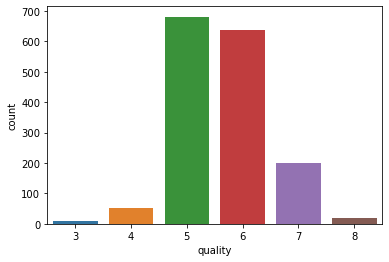

In [9]:
sns.countplot(x="quality", data=wine)

**Analysing Fixed acidity**

<AxesSubplot:ylabel='Frequency'>

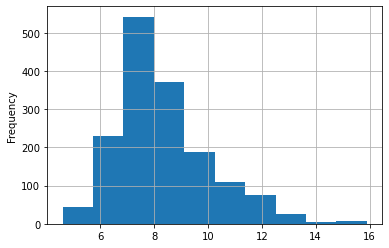

In [11]:
wine['fixed acidity'].plot.hist(grid=True)


In [24]:
print('Min value',wine['fixed acidity'].min())
print('Max value', wine['fixed acidity'].max())

Min value 4.6
Max value 15.9


As we can see the fixed have values between 4.6 and 15.9

**Analysing Volatile acidity**

<AxesSubplot:ylabel='Frequency'>

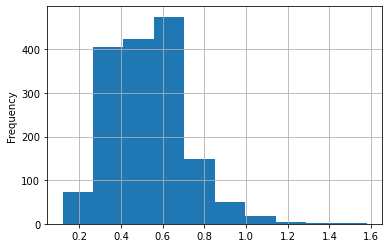

In [15]:
wine['volatile acidity'].plot.hist(grid=True)


In [25]:
print('Min value',wine['volatile acidity'].min())
print('Max value', wine['volatile acidity'].max())

Min value 0.12
Max value 1.58


As we can see the volatile acidity have values between 0.12 and 1.58

**Analysing Citric acidity**

<AxesSubplot:ylabel='Frequency'>

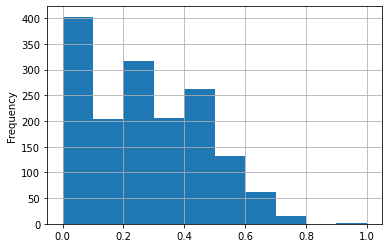

In [26]:
wine['citric acid'].plot.hist(grid=True)


In [27]:
print('Min value',wine['citric acid'].min())
print('Max value', wine['citric acid'].max())

Min value 0.0
Max value 1.0


As we can see the citric acidity have values between 0 and 1

**Analysing residual sugar**

<AxesSubplot:ylabel='Frequency'>

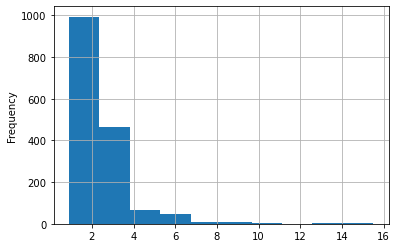

In [30]:
wine['residual sugar'].plot.hist(grid=True)


In [31]:
print('Min value',wine['residual sugar'].min())
print('Max value',wine['residual sugar'].max())

Min value 0.9
Max value 15.5


As we can see the residual sugar have values between 0.9 and 15.5



**Analysing chlorides**

<AxesSubplot:ylabel='Frequency'>

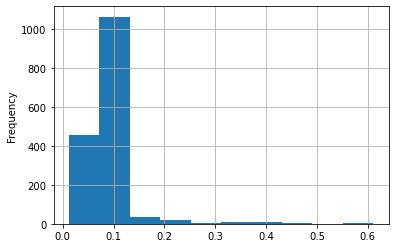

In [34]:
wine['chlorides'].plot.hist(grid=True)


In [35]:
print('Min value',wine['chlorides'].min())
print('Max value',wine['chlorides'].max())

Min value 0.012
Max value 0.611


As we can see the chlorides have values between 0.012 and 0.611


**Analysing free sulfur dioxide**

<AxesSubplot:ylabel='Frequency'>

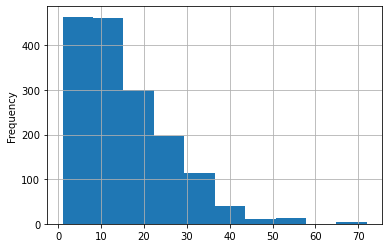

In [37]:
wine['free sulfur dioxide'].plot.hist(grid=True)

In [38]:
print('Min value',wine['free sulfur dioxide'].min())
print('Max value',wine['free sulfur dioxide'].max())

Min value 1.0
Max value 72.0


As we can see the free sulfur dioxide have values between 1 and 72



**Analysing total sulfur dioxide**

<AxesSubplot:ylabel='Frequency'>

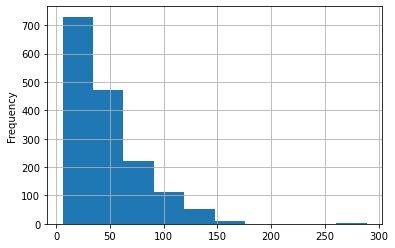

In [40]:
wine['total sulfur dioxide'].plot.hist(grid=True)

In [41]:
print('Min value',wine['total sulfur dioxide'].min())
print('Max value',wine['total sulfur dioxide'].max())

Min value 6.0
Max value 289.0


As we can see the total sulfur dioxide have values betwee6 1 and 289. 
We can deduce that we have certainly outliers here

**Analysing density**

<AxesSubplot:ylabel='Frequency'>

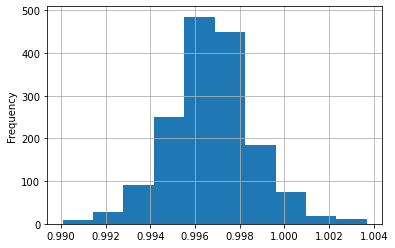

In [43]:
wine['density'].plot.hist(grid=True)

In [44]:
print('Min value',wine['density'].min())
print('Max value',wine['density'].max())

Min value 0.99007
Max value 1.00369


As we can see the density have values betwee6 0.99007 and 1.00369. 



**Analysing pH**

<AxesSubplot:ylabel='Frequency'>

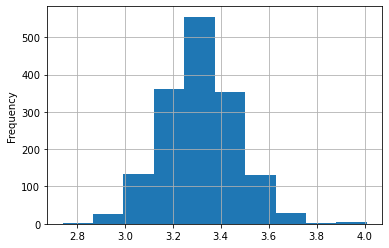

In [47]:
wine['pH'].plot.hist(grid=True)

In [48]:
print('Min value',wine['pH'].min())
print('Max value',wine['pH'].max())

Min value 2.74
Max value 4.01


As we can see the ph have values betwee6 2.74 and 4.01. 



**Analysing sulphates**

<AxesSubplot:ylabel='Frequency'>

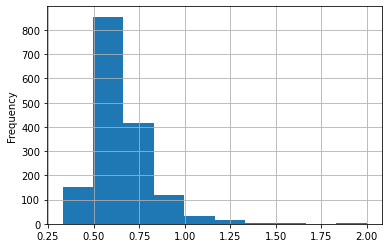

In [50]:
wine['sulphates'].plot.hist(grid=True)

In [51]:
print('Min value',wine['sulphates'].min())
print('Max value',wine['sulphates'].max())

Min value 0.33
Max value 2.0


As we can see the sulfates have values betwee6 0.33 and 2.0. 




**Analysing alcohol**

<AxesSubplot:ylabel='Frequency'>

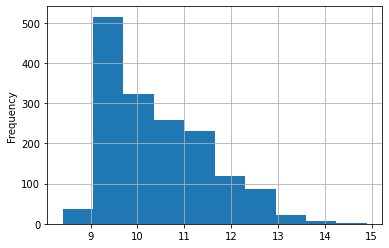

In [53]:
wine['alcohol'].plot.hist(grid=True)

In [54]:
print('Min value',wine['alcohol'].min())
print('Max value',wine['alcohol'].max())

Min value 8.4
Max value 14.9


As we can see the alcohol have values betwee6 8.4 and 14.9. 


All the max and min values will help us when building the application ! 

**Let's havae a look at density and alcohol**

<AxesSubplot:xlabel='density', ylabel='alcohol'>

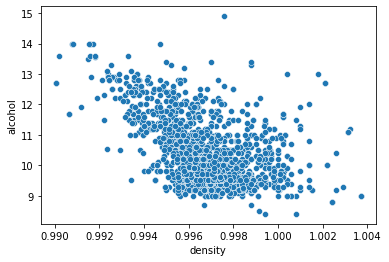

In [55]:
sns.scatterplot(x='density', y='alcohol', data=wine)

**Let's havae a look at pH and alcohol**

<AxesSubplot:xlabel='pH', ylabel='alcohol'>

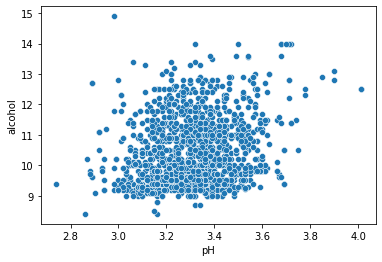

In [56]:
sns.scatterplot(x='pH', y='alcohol', data=wine)

<AxesSubplot:xlabel='density'>

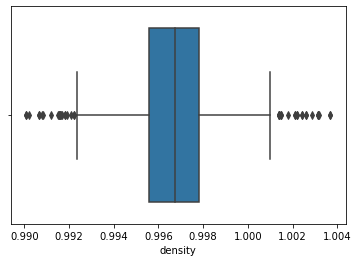

In [59]:
sns.boxplot(data=wine, x='density')

Most value have a density between 0.996 and 0.998

### Checking for Missing Values

### Checking for Outliers



In [72]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We have any missing values

## Let's try to understand how to have a quality wine

Here we see that fixed acidity does not give any specification to classify the quality.



<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

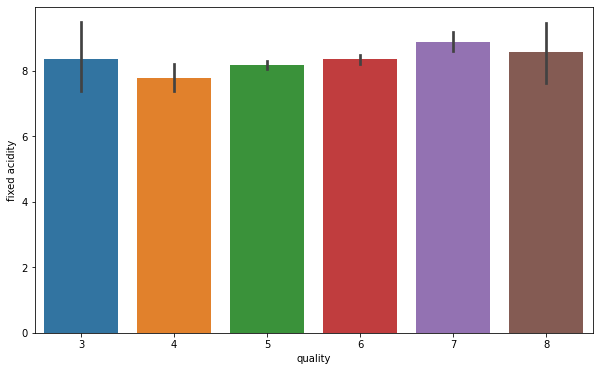

In [65]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

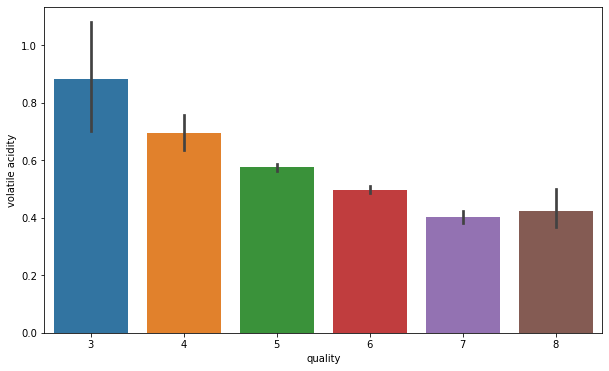

In [60]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

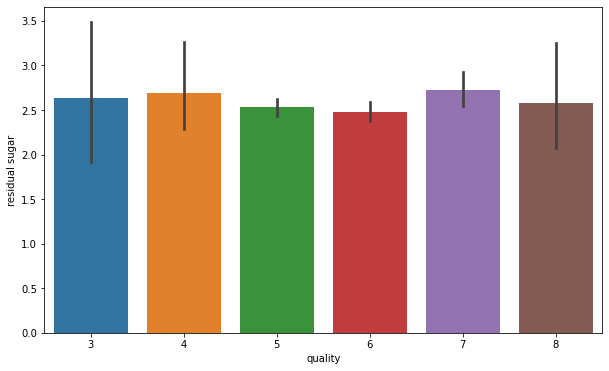

In [66]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

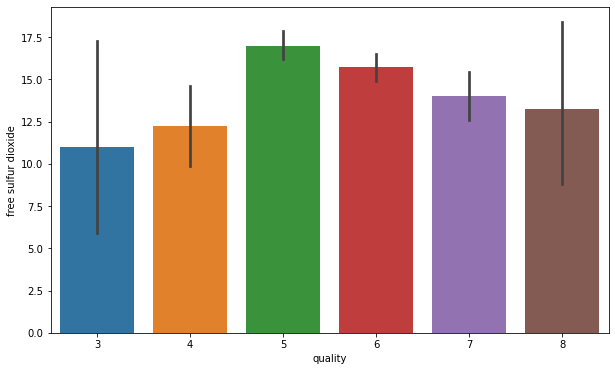

In [67]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

Composition of citric acid go higher as we go higher in the quality of the wine


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

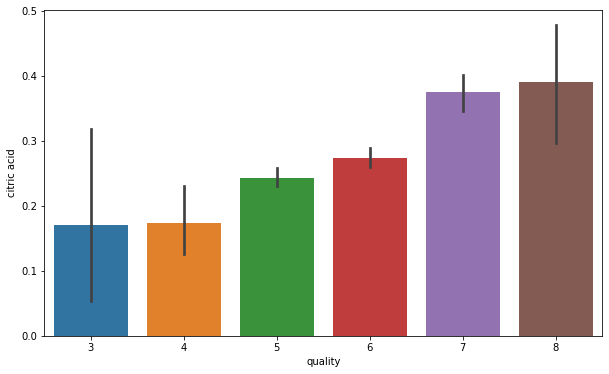

In [61]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

Composition of chloride also go down as we go higher in the quality of the wine



<AxesSubplot:xlabel='quality', ylabel='chlorides'>

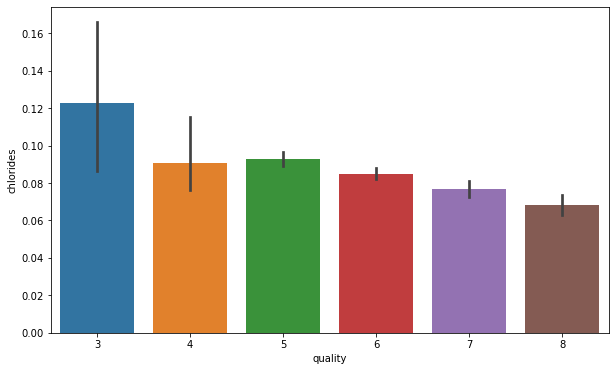

In [62]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

Sulphates level goes higher with the quality of wine


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

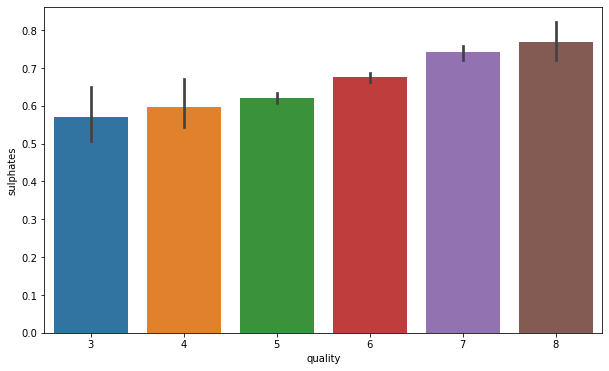

In [63]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Alcohol level also goes higher as te quality of wine increases


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

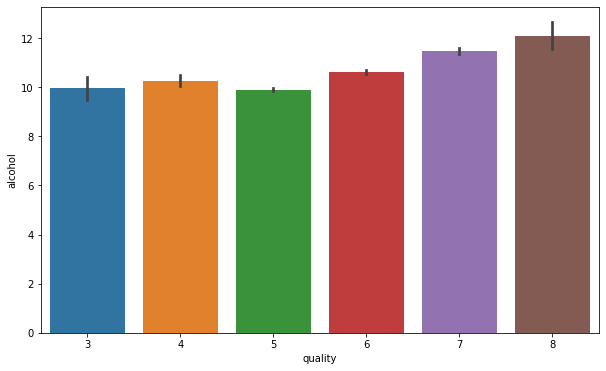

In [64]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Quality level also goes higher as te PH of wine decreases

<AxesSubplot:xlabel='quality', ylabel='pH'>

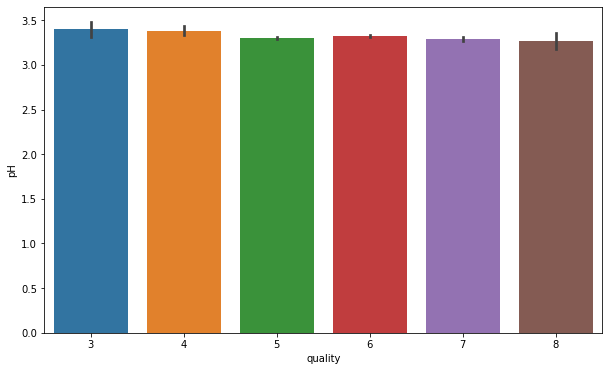

In [68]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

#### From the above visualisation we observe that:

- Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.
Quality increases with : 
- decrease in volatile acidity.
- increase in citric acid.
- decrease in chlorides.
- decrease in pH.
- increase in sulphates.
- increase in alcohol.
- Free sulfur dioxide alone will not be able to predict the quality.
- Total sulfur dioxide alone will not be able to predict the quality.

### Correlation

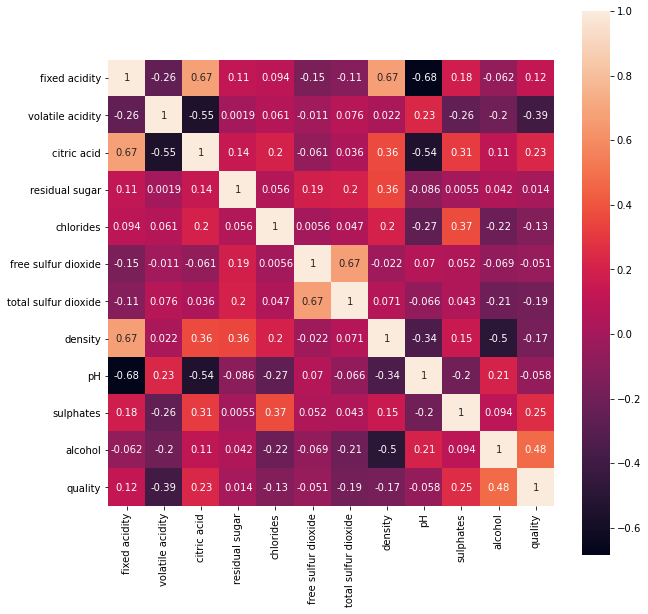

In [73]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(method='pearson'), annot=True, square=True)
plt.show()

In [81]:
print('Correlation of different features of our dataset with quality:')
for i in wine.columns:
  corr, _ = pearsonr(wine[i], wine['quality'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
density : -0.1749
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [82]:
#for another view, this method can be used to view correlations
print('Another view of correlations among features:\n')
wine.corr().style.background_gradient(cmap="coolwarm")

Another view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From the above plots and values we observe:

- volatile acidity, chlorides and ph are negatively correlated to quality — hence our statement was right that quality increases with decrease in value of these features; and vice versa for other features.
- free sulfur dioxide and total sulfur dioxide are highly correlated to each other with correlation of 0.67.
- There are many features with correlation < 0.5 to quality, and may be removed from the dataset.

We are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition from other average quality wines, hence we need to take every feature in account while predicting quality of wine, so I am choosing not remove any feature from the dataset.

We will first handle this problem with classification algorithm.

## Machine learning

Dividing quality of wine in two buckets, ie. Good wine and Bad wine, and on the basis of this we will give our final result.

In [84]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


From the above code have divided the quality of wine in two buckets:
- Bad wine : range 2 – 6.5
- Good wine : range 6.5 – 8



Now we will map the values of bad and good to 0 and 1 respectively, as machine learning models can perform calculation only on numerical data:

In [85]:
wine['quality'] = wine['quality'].map({'bad' : 0, 'good' : 1})
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


Let's visualise our new data ! 

0    1382
1     217
Name: quality, dtype: int64


/Users/nathanamar/opt/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


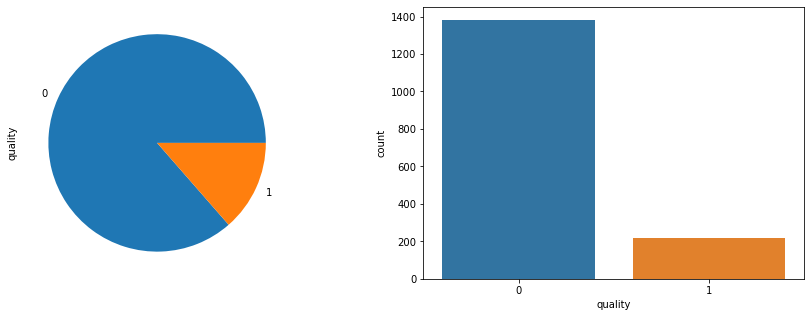

In [86]:
print(wine['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))
ax = ax.flatten()
wine['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(wine['quality'], ax=ax[1])
plt.show()

### Train test split

In [89]:
X = wine.drop('quality', axis = 1)
y = wine['quality']
 
#Creating training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [90]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Our training and testing data is ready now to perform machine learning algorithm

### Logistic Regression

In [117]:
logreg = LogisticRegression(solver='lbfgs', random_state=42)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

     Actual  Predicted
237       0          0
1436      0          0
1350      0          0
724       0          0
629       0          0

Confussion matrix:
[[268   5]
 [ 35  12]]


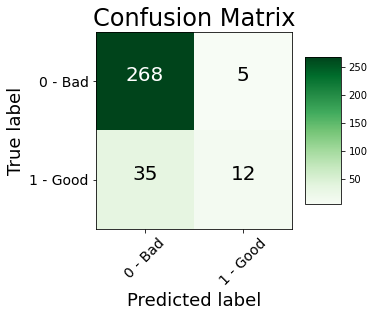

In [121]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, pred_logreg)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

### K-Nearest Neighbour Classification



In [123]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

     Actual  Predicted
803       0          0
124       0          0
350       0          0
682       0          0
1326      0          0

Confussion matrix:
[[266   7]
 [ 34  13]]


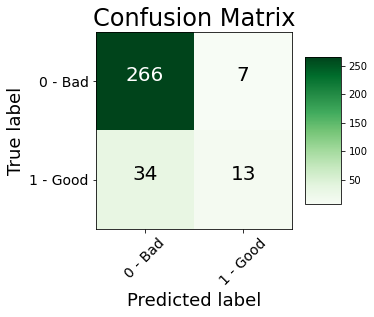

In [124]:
cm = confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

### Random Forrest Classification

In [125]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, y_train)
pred_rf = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

     Actual  Predicted
803       0          0
124       0          0
350       0          0
682       0          0
1326      0          0

Confussion matrix:
[[264   9]
 [ 25  22]]


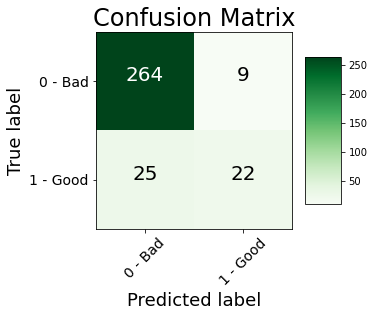

In [126]:
cm = confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

### Checking accuracy of different model

In [127]:
#K-fold cross validation
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Random Forrest']
modelClassifiers = [logreg, knn,rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.89
Accuracy of K-Nearest Neighbour Classification model is 0.89
Accuracy of Random Forrest Classification model is 0.91


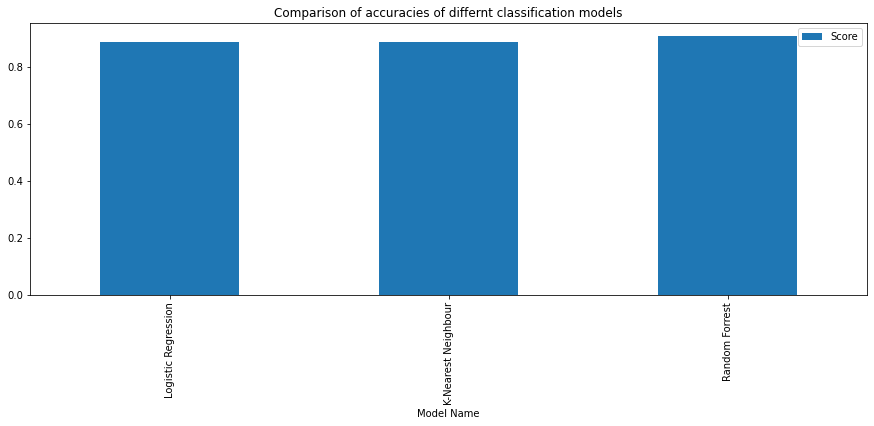

In [128]:
#Plotting the accuracies of different models
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of accuracies of differnt classification models')
plt.show()

### End of classification

#### If you find this notebook useful then please upvote